In [9]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

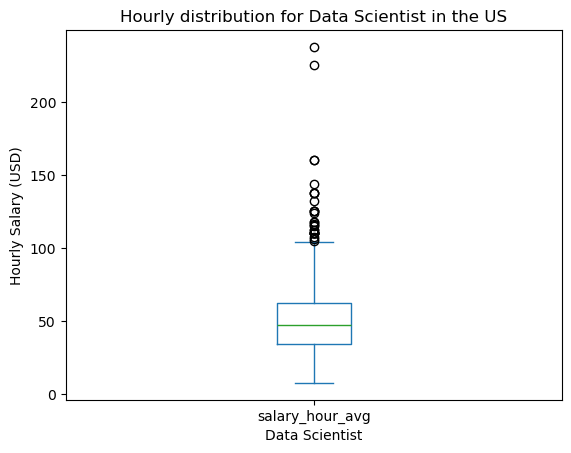

In [10]:
df_DS = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_hour_avg']).copy()

df_DS['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary (USD)')
plt.title('Hourly distribution for Data Scientist in the US')
plt.show()

C:\Users\whitt\AppData\Local\Temp\ipykernel_20960\4184527611.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_list, labels=countries)


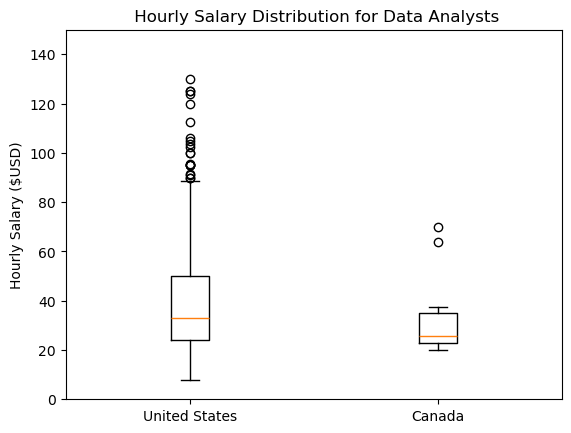

In [11]:
countries = ['United States', 'Canada']
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))].dropna(subset=['salary_hour_avg']).copy()

country_list = [df_DA[df_DA['job_country'] == country]['salary_hour_avg'] for country in countries]

plt.boxplot(country_list, labels=countries)
plt.ylim(0, 150)
plt.ylabel('Hourly Salary ($USD)')
plt.title(' Hourly Salary Distribution for Data Analysts')

plt.show()

C:\Users\whitt\AppData\Local\Temp\ipykernel_20960\1660845643.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles)


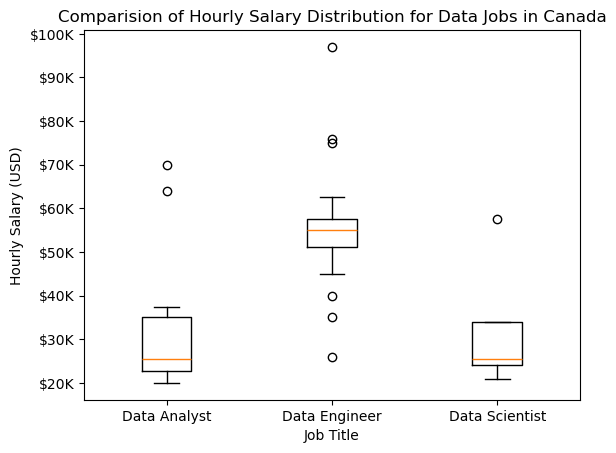

In [22]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_jobs = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset=['salary_hour_avg']).copy()
job_list = [df_jobs[df_jobs['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

plt.boxplot(job_list, labels=job_titles)
plt.xlabel('Job Title')
plt.ylabel('Hourly Salary (USD)')
plt.title('Comparision of Hourly Salary Distribution for Data Jobs in Canada')

ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y)}K')
plt.gca().yaxis.set_major_formatter(ticks_x)
plt.show()

